<a href="https://colab.research.google.com/github/ranjuadhikari14/podcast-listening-time/blob/main/predict_podcast_listening_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)




In [ ]:
#load dataset
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.shape

(505669, 12)

In [ ]:
test_df.shape

(250000, 11)

In [ ]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [ ]:
# concatenate test and train data to make it complete data
complete_df=pd.concat([train_df,test_df])
complete_df.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
complete_df.shape

(755669, 12)

In [ ]:

complete_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [ ]:
#drop target column
complete_df=complete_df.drop(labels=['Listening_Time_minutes'],axis=1)

In [ ]:
complete_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


In [ ]:
# Exploratory Data Analysis

In [ ]:
print("Info of Train data")
train_df.info()

Info of Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505669 entries, 0 to 505668
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           505669 non-null  int64  
 1   Podcast_Name                 505669 non-null  object 
 2   Episode_Title                505669 non-null  object 
 3   Episode_Length_minutes       446817 non-null  float64
 4   Genre                        505669 non-null  object 
 5   Host_Popularity_percentage   505669 non-null  float64
 6   Publication_Day              505669 non-null  object 
 7   Publication_Time             505669 non-null  object 
 8   Guest_Popularity_percentage  407351 non-null  float64
 9   Number_of_Ads                505668 non-null  float64
 10  Episode_Sentiment            505669 non-null  object 
 11  Listening_Time_minutes       505668 non-null  float64
dtypes: float64(5), int64(1), object(6)
memo

In [ ]:
print("Info of Test data")
display(test_df.info())

Info of Test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


None

In [ ]:
#check for null value
train_df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,58852
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,98318
Number_of_Ads,1


In [ ]:
test_df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,28736
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,48832
Number_of_Ads,0


In [ ]:
#percentage of missing null values
train_null_percentage=train_df.isna().sum()/len(train_df)*100
test_null_percentage=test_df.isna().sum()/len(test_df)*100
print("training missing percentage:\n", train_null_percentage)
print("\n\n.........\n")
print("tesing missing percentage:\n", test_null_percentage)

training missing percentage:
 id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.638443
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.443154
Number_of_Ads                   0.000198
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000198
dtype: float64


.........

tesing missing percentage:
 id                              0.0000
Podcast_Name                    0.0000
Episode_Title                   0.0000
Episode_Length_minutes         11.4944
Genre                           0.0000
Host_Popularity_percentage      0.0000
Publication_Day                 0.0000
Publication_Time                0.0000
Guest_Popularity_percentage    19.5328
Number_of_Ads                   0.0000
Episode_Sentiment               

In [ ]:
pd.DataFrame({
    'train_null_percentage': train_null_percentage,
    'test_null_percentage': test_null_percentage
})


,train_null_percentage,test_null_percentage
Episode_Length_minutes,11.638443,11.4944
Episode_Sentiment,0.000000,0.0000
Episode_Title,0.000000,0.0000
Genre,0.000000,0.0000
Guest_Popularity_percentage,19.443154,19.5328
Host_Popularity_percentage,0.000000,0.0000
Listening_Time_minutes,0.000198,NaN
Number_of_Ads,0.000198,0.0000
Podcast_Name,0.000000,0.0000
Publication_Day,0.000000,0.0000


In [ ]:
# maximum value of episode length,number of ads,host popularity, listening time
train_df['Episode_Length_minutes'].max()


325.24

In [ ]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,505669.000000,446817.000000,505669.000000,407351.000000,505668.000000,505668.000000
mean,252834.000000,64.519349,59.851822,52.258251,1.348082,45.454582
std,145974.210973,32.969663,22.872200,28.435839,1.133416,27.148161
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,126417.000000,35.780000,39.410000,28.440000,0.000000,23.186770
50%,252834.000000,63.870000,60.040000,53.620000,1.000000,43.408175
75%,379251.000000,94.080000,79.510000,76.590000,2.000000,64.822573
max,505668.000000,325.240000,118.930000,119.910000,103.910000,119.970000


In [ ]:
train_df['Listening_Time_minutes'].describe()

,Listening_Time_minutes
count,505668.000000
mean,45.454582
std,27.148161
min,0.000000
25%,23.186770
50%,43.408175
75%,64.822573
max,119.970000


In [ ]:
 # 1. UniVariate Analysis



In [ ]:
#1.1 Podcast Genre Name Distribution

In [ ]:
complete_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

In [ ]:
podcast_name=complete_df.groupby(by="Podcast_Name")['Genre'].count().sort_values(ascending=False)
podcast_name

,Genre
Podcast_Name,
Tech Talks,22935
Sports Weekly,20110
Funny Folks,19920
Fitness First,19625
Tech Trends,19622
Style Guide,19588
Business Insights,19560
Game Day,19460
Melody Mix,19039


In [ ]:
complete_df.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


In [ ]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755669 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           755669 non-null  int64  
 1   Podcast_Name                 755669 non-null  object 
 2   Episode_Title                755669 non-null  object 
 3   Episode_Length_minutes       668081 non-null  float64
 4   Genre                        755669 non-null  object 
 5   Host_Popularity_percentage   755669 non-null  float64
 6   Publication_Day              755669 non-null  object 
 7   Publication_Time             755669 non-null  object 
 8   Guest_Popularity_percentage  608519 non-null  float64
 9   Number_of_Ads                755668 non-null  float64
 10  Episode_Sentiment            755669 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 69.2+ MB


In [ ]:
podcast_dict={'podcast name':podcast_name.index,
 'count':podcast_name.values}
podcast_df=pd.DataFrame(podcast_dict)
podcast_df

,podcast name,count
0,Tech Talks,22935
1,Sports Weekly,20110
2,Funny Folks,19920
3,Fitness First,19625
4,Tech Trends,19622
5,Style Guide,19588
6,Business Insights,19560
7,Game Day,19460
8,Melody Mix,19039
9,Criminal Minds,18036


In [ ]:
# plot the podcast name with barplot

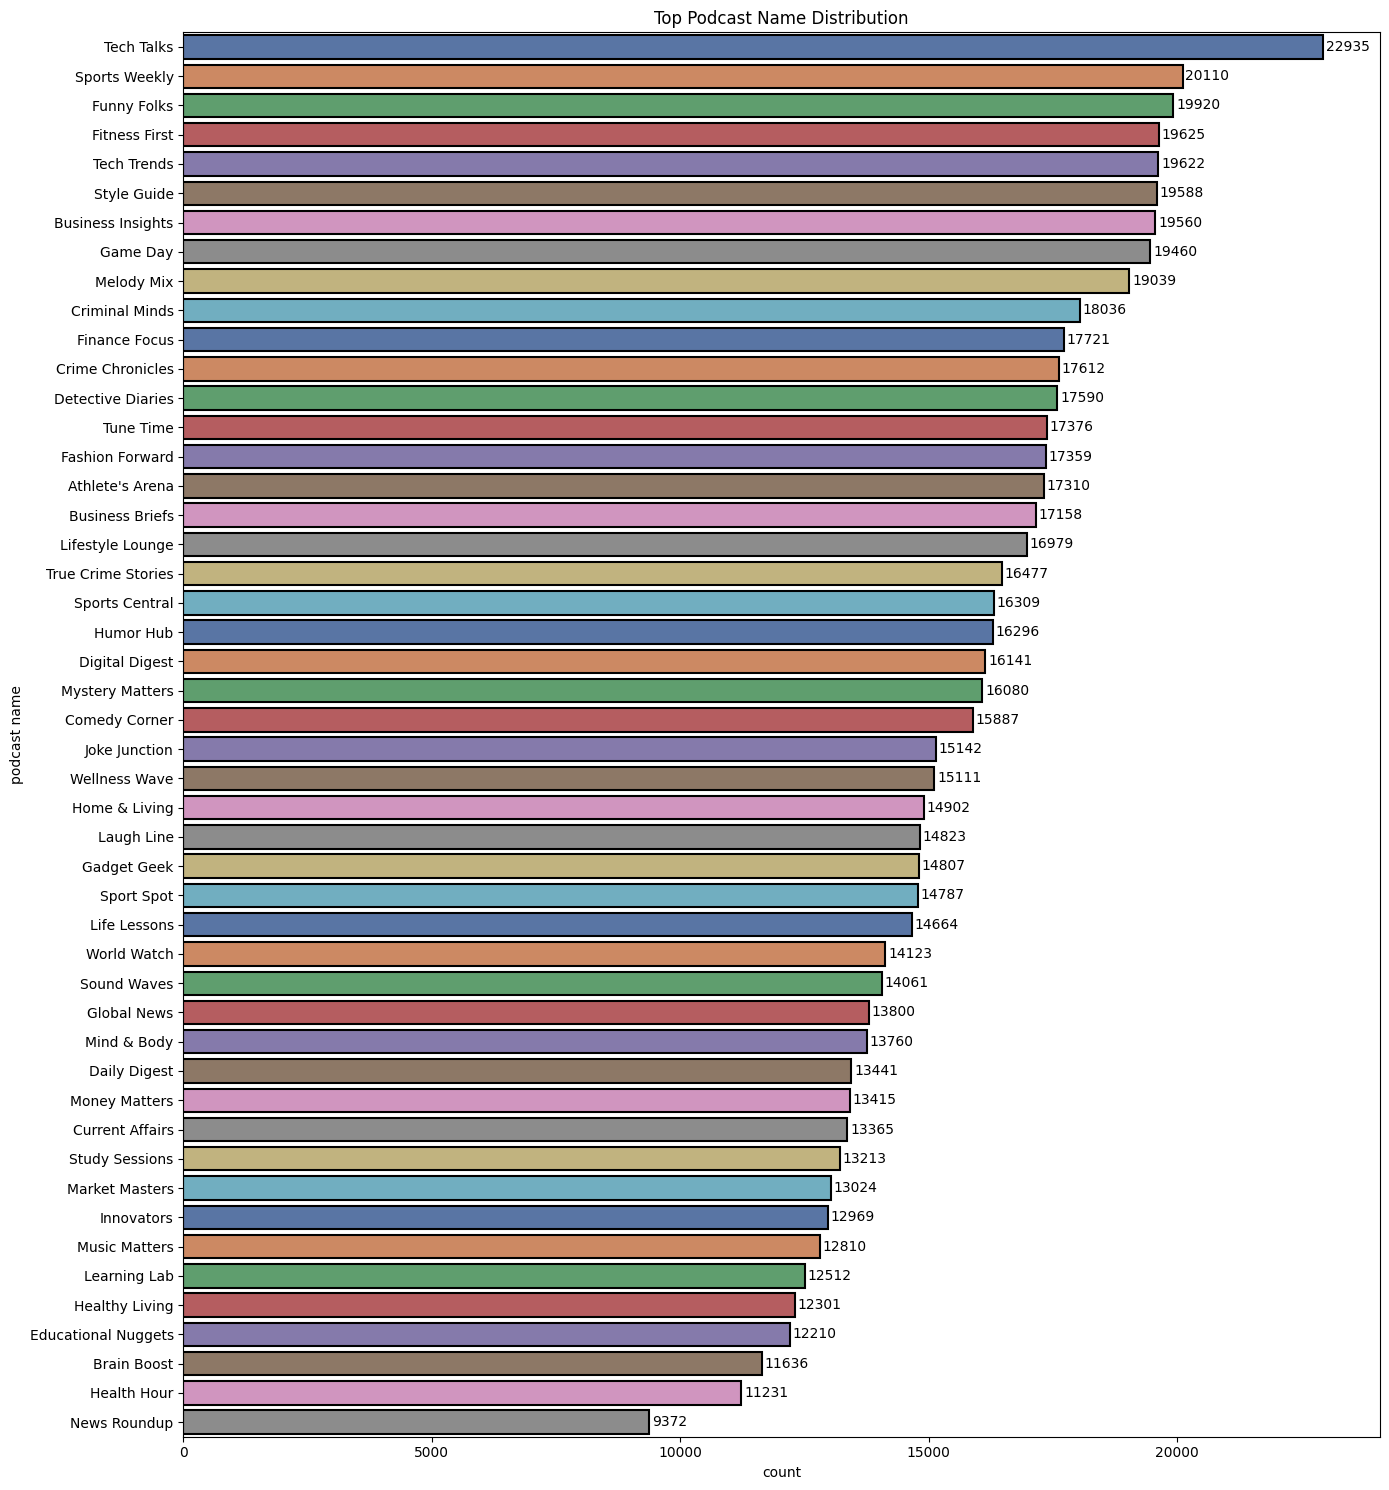

In [ ]:

plt.figure(figsize=(14,15))
ax = sns.barplot(
    y=podcast_df['podcast name'],
    x=podcast_df['count'],
    edgecolor='black',
    palette='deep',
    linewidth=1.5,
    orient='h'
)

# Fix: 'ax.containers' instead of 'ax.container'
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color='black')

plt.title('Top Podcast Name Distribution')
plt.tight_layout()  # Optional: ensures everything fits well
plt.show()

In [ ]:
# observation
# 1.Tech Talks are the popular podcast with 30400 episode

Text(0.5, 1.0, 'WORDCLOUD for PODCAST NAME')

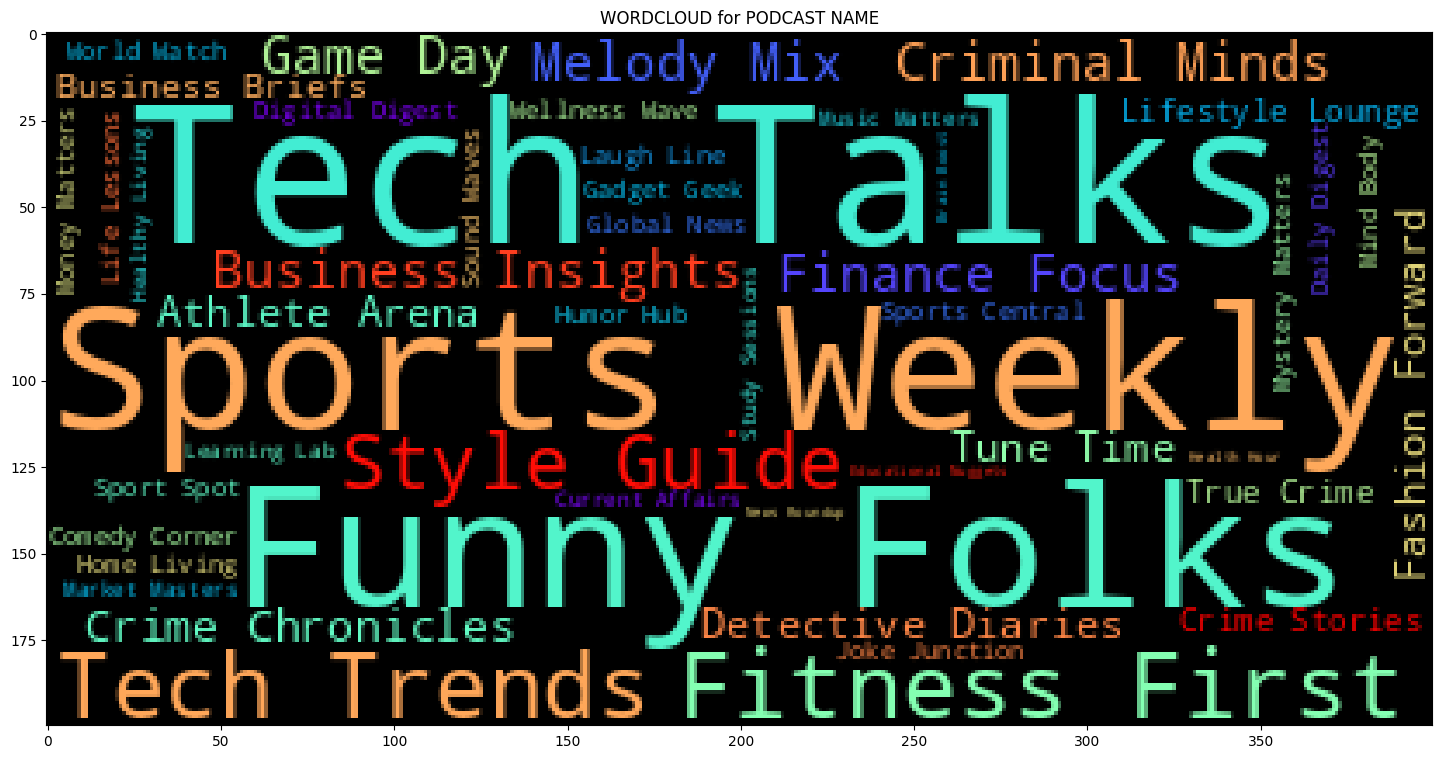

In [ ]:

plt.figure(figsize=(18,9))

wordCloud=WordCloud(width=400,
          height=200,
          max_words=50,
          random_state=2025,
          colormap='rainbow'
      )
wordCloud= wordCloud.generate(text=' '.join(complete_df['Podcast_Name']))
plt.imshow(wordCloud)
plt.title('WORDCLOUD for PODCAST NAME')

In [ ]:
#1.2# Top 10 PODCAST with  Average EPISODE LENGTH

In [ ]:
ep_duration=complete_df.groupby(by='Podcast_Name')['Episode_Length_minutes'].mean().sort_values(ascending=False).reset_index(drop=False).head(10)
ep_duration

,Podcast_Name,Episode_Length_minutes
0,Market Masters,6843.274343
1,Melody Mix,68.296070
2,Sports Weekly,66.989906
3,Business Briefs,66.858107
4,Money Matters,66.706995
5,Mind & Body,66.501937
6,Home & Living,66.414557
7,Crime Chronicles,66.097575
8,Tune Time,66.089996
9,Study Sessions,66.001835


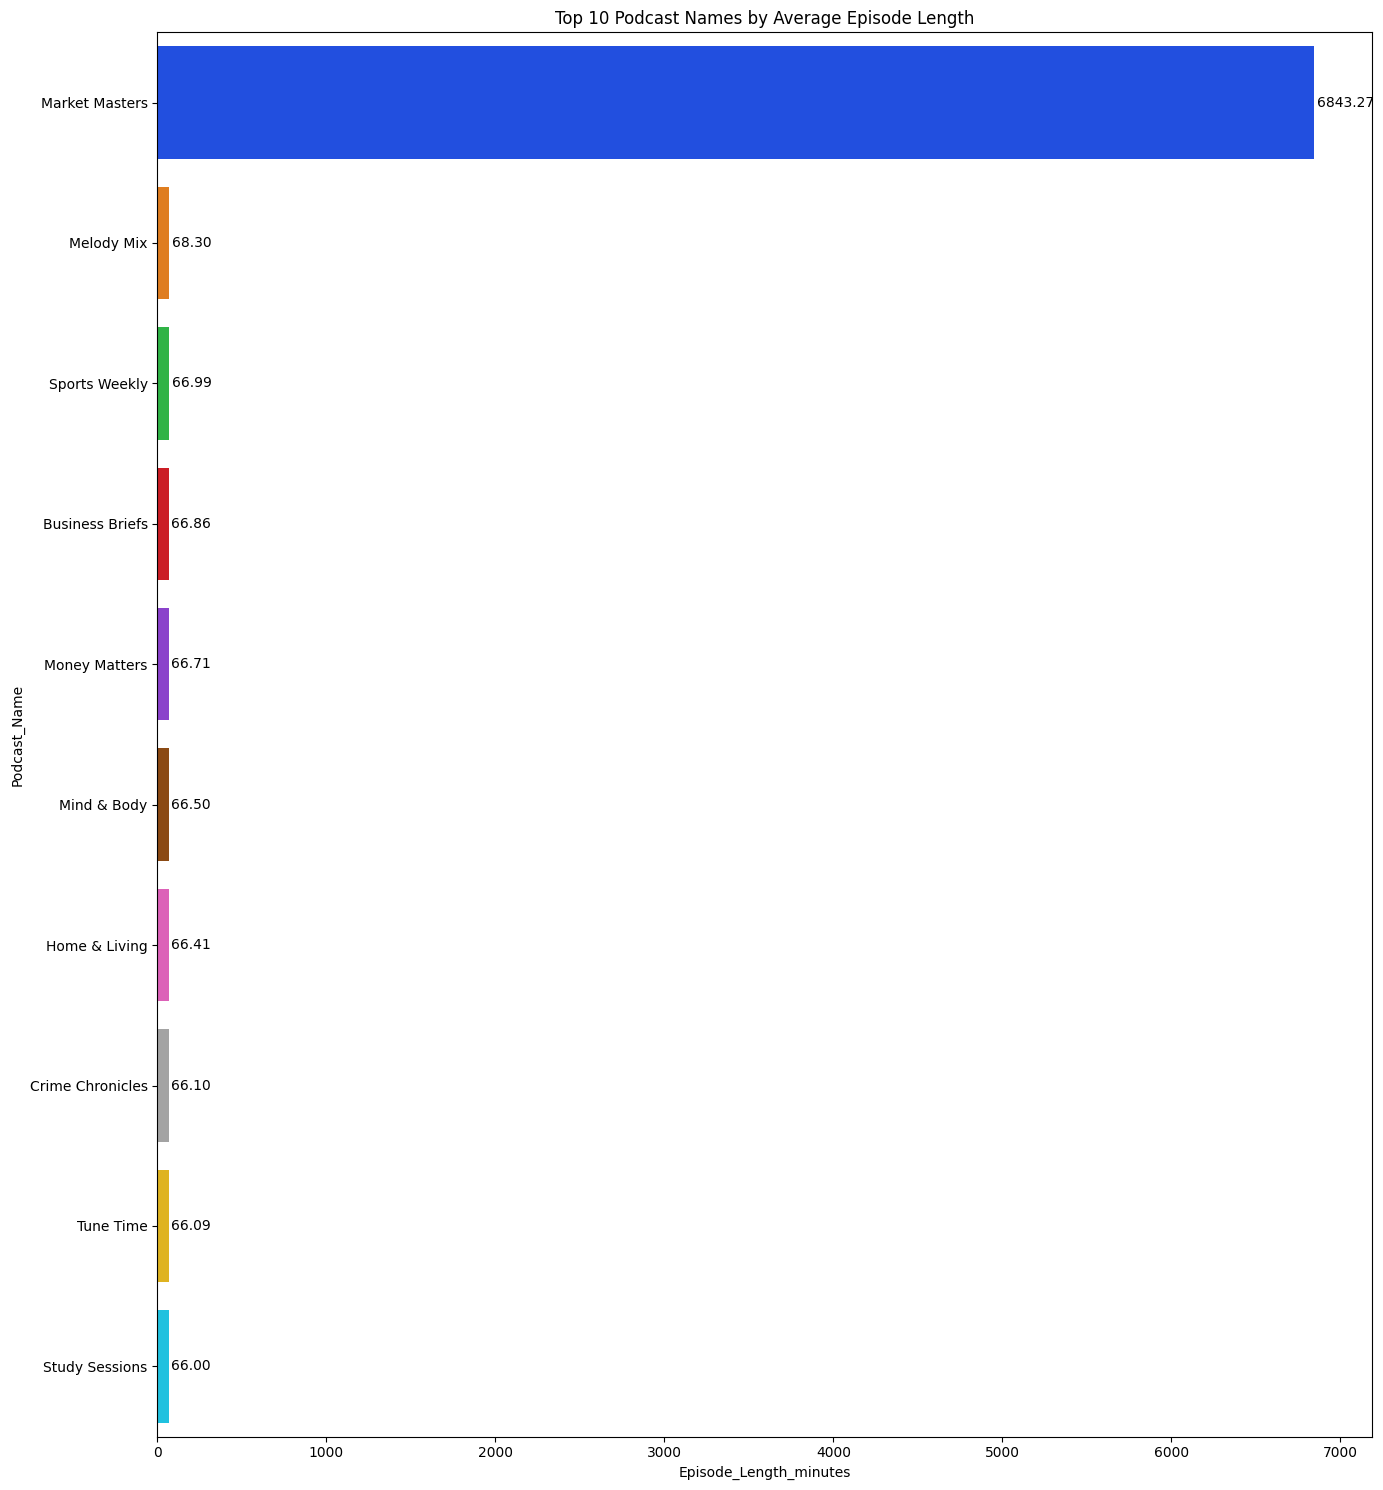

In [ ]:
plt.figure(figsize=(14, 15))

ax = sns.barplot(data=ep_duration, x='Episode_Length_minutes', y='Podcast_Name', palette='bright')

# Fix: Use 'bar' instead of undefined 'container'
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2, fontsize=10, color='black')

plt.title('Top 10 Podcast Names by Average Episode Length')
plt.tight_layout()
plt.show()


In [ ]:
### Observation
# 1. The average length of podcast is 1 hour
# 2. we have one suspecious podcast with 100 hours + per episode length

In [ ]:
complete_df = complete_df.reset_index(drop=True)

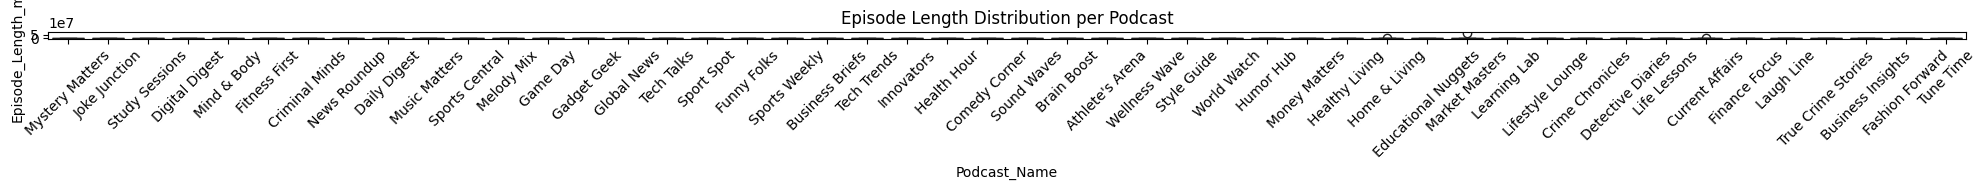

In [ ]:
## BOXPLOT
plt.figure(figsize=(20, 2))

sns.boxplot(
    data=complete_df,
    x='Podcast_Name',
    y='Episode_Length_minutes',
    palette='dark'
)

plt.xticks(rotation=45)
plt.title("Episode Length Distribution per Podcast")
plt.tight_layout()  # Optional, makes sure labels don't get cut off
plt.show()
